In [335]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate


import pandas as pd
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_train_dataset.csv')
df.head(10)

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
5,5,w53495 w306061 w372126 w47982 w66980 w189406 w...,1,0,0,0,1
6,6,w237465 w256553 w286461 w382662 w206066 w12125...,1,0,0,1,0
7,7,w173317 w39222 w207614 w136665 w394246 w197783...,1,1,1,0,0
8,8,w373517 w37419 w358253 w162965 w286461 w204762...,1,0,0,0,0
9,9,w230409 w109269 w369689 w186076 w377961 w21787...,1,1,0,0,0


In [3]:
df_labels = df[["outwear", "top", "trousers", "women dresses", "women skirts"]]
df_labels.head()

,outwear,top,trousers,women dresses,women skirts
0,1,0,1,0,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


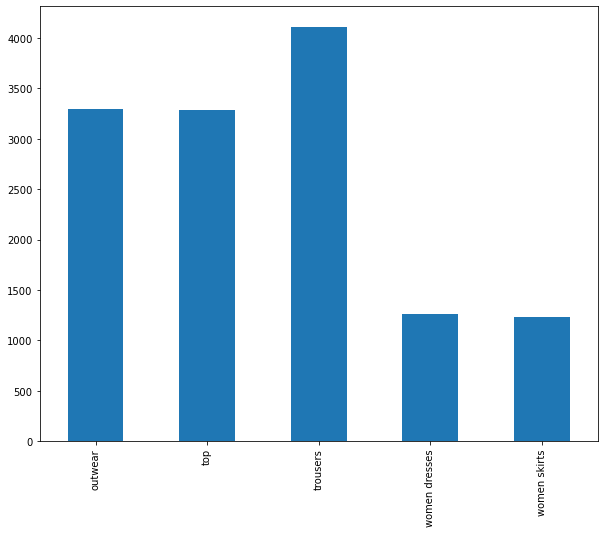

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_labels.sum(axis=0).plot.bar()

In [9]:
X = list(df["word_representation"])
y = df_labels.values
print(X[1])

w195317 w127737 w171593 w22890 w342007 w217871 w289824 w500005 w85858 w241910 w194870 w192814 w127834 w263923 w241910


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_test[1])
#why fix num words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
#what is max len
maxlen = 20

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

w195317 w256553 w39218 w288320 w1867 w120979 w66980 w194870 w13069 w42169 w251935 w185379 w111248 w376672 w85858 w166407 w12685


In [188]:
print(type(X_test))
print(type(y_train))
print(X_test[1])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 13  27  54 844  24   7   9   2 670 101 543 166  12 333  48 985  30   0
   0   0]


In [83]:
from numpy import array
from numpy import asarray
from numpy import zeros
import pickle


embeddings_dictionary = pd.read_pickle("word_embeddings.pkl")
#glove_file = open('C:\\Users\\Raphael\\Documents\\TIL-2020\\NLP\\glove.6B.100d.txt', encoding="utf8")


print(type(glove_file))

# embeddings_dictionary = dict()



# for line in glove_file:
#     records = line.split()
#     word = glove_file.key
#     vector_dimensions = asarray(records[1:], dtype='float32')
#     embeddings_dictionary[word] = vector_dimensions
# #glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
print(type(embedding_matrix))


<class '_io.TextIOWrapper'>
<class 'numpy.ndarray'>


In [358]:

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(160)(embedding_layer)
dense_layer_1 = Dense(5, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [368]:
from tensorflow.keras.layers import Bidirectional
model2 = Sequential()
#model2.add(tensorflow.keras.Input(shape=(maxlen,)))
model2.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False, input_shape=(maxlen,)))
model2.add(Bidirectional(LSTM(100, return_sequences=False),merge_mode="concat"))
model2.add(Dropout(0.1))
# model2.add(Dense(units=50))
model2.add(Dense(units=5))
model2.add(Activation('sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model2.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_51 (Embedding)     (None, 20, 100)           396900    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 5)                 1005      
_________________________________________________________________
activation_12 (Activation)   (None, 5)                 0         
Total params: 558,705
Trainable params: 161,805
Non-trainable params: 396,900
_________________________________________________________________
None


In [318]:
print(model.summary())
print(type(X_test))
print(len(X_test[1]))
print(len(X))
print(X_test[1])

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 20)]              0         
_________________________________________________________________
embedding_33 (Embedding)     (None, 20, 100)           396900    
_________________________________________________________________
lstm_36 (LSTM)               (None, 160)               167040    
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 805       
Total params: 564,745
Trainable params: 167,845
Non-trainable params: 396,900
_________________________________________________________________
None
<class 'numpy.ndarray'>
20
7380
[ 13  27  54 844  24   7   9   2 670 101 543 166  12 333  48 985  30   0
   0   0]


In [338]:
#play with epichs, batch size and verbose
history = model.fit(X_train, y_train, batch_size=160, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
26/26 [==============================] - 2s 66ms/step - loss: 0.5725 - acc: 0.2948 - val_loss: 0.4845 - val_acc: 0.3821
Epoch 2/15
26/26 [==============================] - 1s 53ms/step - loss: 0.4259 - acc: 0.4743 - val_loss: 0.3671 - val_acc: 0.5062
Epoch 3/15
26/26 [==============================] - 1s 54ms/step - loss: 0.3236 - acc: 0.5240 - val_loss: 0.2756 - val_acc: 0.5485
Epoch 4/15
26/26 [==============================] - 1s 53ms/step - loss: 0.2468 - acc: 0.5305 - val_loss: 0.2294 - val_acc: 0.5119
Epoch 5/15
26/26 [==============================] - 1s 53ms/step - loss: 0.2039 - acc: 0.5411 - val_loss: 0.2085 - val_acc: 0.5271
Epoch 6/15
26/26 [==============================] - 1s 54ms/step - loss: 0.1711 - acc: 0.5460 - val_loss: 0.1847 - val_acc: 0.5536
Epoch 7/15
26/26 [==============================] - 1s 53ms/step - loss: 0.1472 - acc: 0.5465 - val_loss: 0.1640 - val_acc: 0.5559
Epoch 8/15
26/26 [==============================] - 1s 53ms/step - loss: 0.1317 - a

In [364]:
model2.fit(X_train, y_train, batch_size=160, epochs=10, validation_split=0.3)

score = model2.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
26/26 [==============================] - 2s 96ms/step - loss: 0.5849 - acc: 0.2442 - val_loss: 0.5355 - val_acc: 0.4159
Epoch 2/10
26/26 [==============================] - 2s 74ms/step - loss: 0.4666 - acc: 0.4180 - val_loss: 0.4026 - val_acc: 0.6016
Epoch 3/10
26/26 [==============================] - 2s 74ms/step - loss: 0.3411 - acc: 0.5486 - val_loss: 0.2935 - val_acc: 0.5237
Epoch 4/10
26/26 [==============================] - 2s 74ms/step - loss: 0.2507 - acc: 0.5639 - val_loss: 0.2276 - val_acc: 0.5468
Epoch 5/10
26/26 [==============================] - 2s 73ms/step - loss: 0.1970 - acc: 0.5494 - val_loss: 0.1888 - val_acc: 0.5576
Epoch 6/10
26/26 [==============================] - 2s 75ms/step - loss: 0.1609 - acc: 0.5552 - val_loss: 0.1696 - val_acc: 0.5615
Epoch 7/10
26/26 [==============================] - 2s 74ms/step - loss: 0.1379 - acc: 0.5576 - val_loss: 0.1554 - val_acc: 0.5751
Epoch 8/10
26/26 [==============================] - 2s 73ms/step - loss: 0.1235 - a

In [355]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])
#round off sigmoid values to 0 or 1?

47/47 [==============================] - 0s 8ms/step - loss: 0.1436 - acc: 0.5847
Test Score: 0.14357894659042358
Test Accuracy: 0.5846883654594421


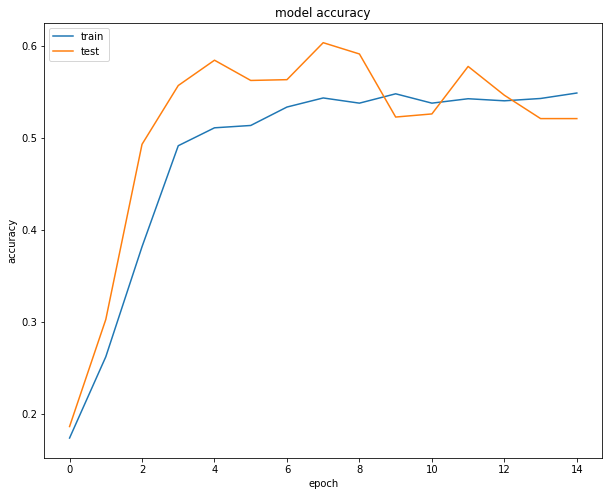

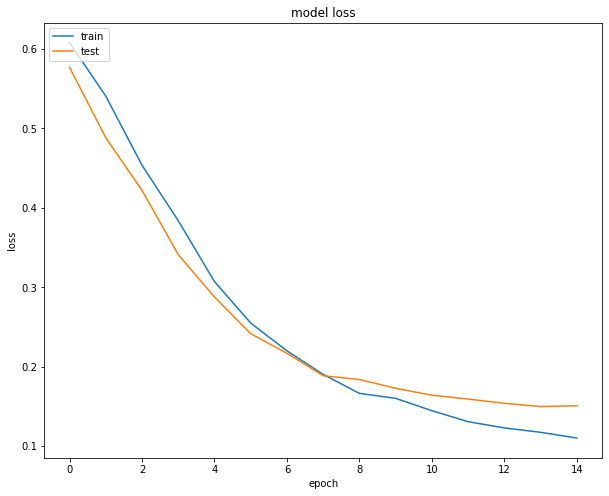

In [307]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [311]:
df_val = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_test_dataset.csv')
df_val.head(10)
X_val=df_val['word_representation'].values
print(type(X_val))

<class 'numpy.ndarray'>


In [308]:

preds = model.predict(X_test)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0
print(preds)
preds_df=pd.DataFrame(data=preds, columns = ["outwear","top","trousers","women dresses","women skirts"])
preds_df.index.name = "id"
print(preds_df)

[[0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 ...
 [1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0.]]
      outwear  top  trousers  women dresses  women skirts
id                                                       
0         0.0  0.0       0.0            0.0           1.0
1         0.0  1.0       1.0            0.0           0.0
2         1.0  1.0       0.0            0.0           0.0
3         0.0  0.0       0.0            1.0           0.0
4         0.0  0.0       1.0            0.0           0.0
...       ...  ...       ...            ...           ...
1471      0.0  0.0       0.0            1.0           1.0
1472      0.0  0.0       1.0            0.0           0.0
1473      1.0  1.0       0.0            0.0           0.0
1474      0.0  1.0       1.0            0.0           0.0
1475      0.0  1.0       1.0            0.0           0.0

[1476 rows x 5 columns]


In [309]:
preds_df.to_csv("predictions.csv")

In [312]:
print(X_val[1])

X_val = tokenizer.texts_to_sequences(X_val)

X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

w237465 w167111 w279437 w194870 w351537 w175602 w209059 w118125 w120979 w150520 w59496 w34893 w189307 w144920 w187552 w239430 w162756 w255783 w342007


In [313]:

#preds_val = model.predict(X_val)

print(X_val[1])
print(len(X_val[1]))
print(len(X_val))


[  32  330   90    2  182  792 2419   80    7  581  243    1  608  158
  255  122   77  110   29    0]
20
2460


In [314]:
preds_val = model.predict(X_val, verbose = 1)
preds_val[preds_val>=0.5] = 1
preds_val[preds_val<0.5] = 0

print(preds_val)
type(preds_val[1,1])

77/77 [==============================] - 1s 7ms/step
[[0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 ...
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]


numpy.float32

In [315]:

preds_val_df=pd.DataFrame(data=preds_val, columns = ["outwear","top","trousers","women dresses","women skirts"])
preds_val_df.index.name = "id"

print(preds_val_df)
preds_val_df = preds_val_df.astype(int)
preds_val_df.dtypes

      outwear  top  trousers  women dresses  women skirts
id                                                       
0         0.0  1.0       1.0            0.0           0.0
1         1.0  1.0       0.0            0.0           0.0
2         1.0  0.0       1.0            0.0           0.0
3         0.0  1.0       1.0            0.0           0.0
4         1.0  1.0       1.0            0.0           0.0
...       ...  ...       ...            ...           ...
2455      0.0  0.0       1.0            1.0           0.0
2456      1.0  0.0       1.0            0.0           0.0
2457      1.0  0.0       1.0            0.0           0.0
2458      0.0  1.0       1.0            0.0           0.0
2459      0.0  0.0       1.0            0.0           1.0

[2460 rows x 5 columns]


outwear          int32
top              int32
trousers         int32
women dresses    int32
women skirts     int32
dtype: object

In [316]:
#preds_val_df.to_csv("predictionsVal.csv")
#preds_val_df.to_csv("mightbeoverfit.csv")
preds_val_df.to_csv("densermodel.csv")


In [284]:
maxval = [0]
for line in X_val:
    if len(line)>max(maxval):
        maxval.append(len(line))
print(maxval)

[0, 20]
